In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data: enterprise survey 2016

In [4]:
%%time
# data_df
data_df = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/data/ES/dn2016.dta')

print('data_df shape: {}'.format(data_df.shape))

data_df shape: (517695, 215)
CPU times: user 27.6 s, sys: 3.52 s, total: 31.1 s
Wall time: 45.6 s


In [5]:
data_df.sample(5)

,tinh,capso,ma_thue,ma_thue2,huyen,xa,namsinh,gioitinh,dantoc,quoctich,tdcm,lhdn,von_nntw,von_nndp,ct_nn,htx,von_nn,co_chiphoi,co_khucn,khucn,tthd,tennganhkd,nganh_kd,ten_nkd1,nkd1,ten_nkd2,nkd2,ten_nkd3,nkd3,ten_nkd4,nkd4,ten_nkd5,nkd5,ten_nkd6,nkd6,ten_nkd7,nkd7,ten_nkd8,nkd8,ten_nkd9,nkd9,ten_nkd10,nkd10,ten_nkd11,nkd11,tsld,tsldnu,ld11,ld21,ld31,ld41,ld51,ld61,ld71,ld81,ld91,ld101,ld111,ld121,ld131,ld141,ld151,ld161,ld171,ld181,ld191,ldnc1,nld1,ldn11,nld2,ldn21,nld3,ldn31,nld4,ldn41,nld5,ldn51,nld6,ldn61,nld7,ldn71,nld8,ldn81,nld9,ldn91,nld10,ldn101,nld11,ldn111,tn1,tn2,tn3,ts11,ts12,ts21,ts22,ts31,ts32,ts41,ts42,ts51,ts52,ts61,ts62,ts71,ts72,ts81,ts82,ts91,ts92,ts101,ts102,ts111,ts112,ts121,ts122,ts131,ts132,ts141,ts142,ts151,ts152,ts162,ts172,ts182,ts191,ts192,ts201,ts202,ts211,ts212,ts221,ts222,ts232,ts242,ts252,ts262,ts272,ts281,ts282,ts291,ts292,ts301,ts302,ts311,ts312,ts321,ts322,kqkd1,kqkd2,kqkd3,kqkd4,kqkd5,kqkd6,kqkd7,kqkdc,nkqkd1,kqkdn1,nkqkd2,kqkdn2,nkqkd3,kqkdn3,nkqkd4,kqkdn4,nkqkd5,kqkdn5,nkqkd6,kqkdn6,nkqkd7,kqkdn7,nkqkd8,kqkdn8,nkqkd9,kqkdn9,nkqkd10,kqkdn10,nkqkd11,kqkdn11,kqkd8,kqkd9,kqkd10,kqkd11,kqkd12,kqkd13,kqkd14,kqkd15,kqkd16,kqkd17,kqkd18,kqkd19,kqkd20,kqkd21,kqkd22,kqkd23,nns11,nns12,nns21,nns22,nns31,nns32,nns41,nns42,nns51,nns52,nns61,nns62,tenvp,dchivp,huyenvp,tinhvp,ma_thuevp,tennganhvp,nganh_kdvp,ldvp,ldvp_nu
406092,79,1,0309944003,,765,26935,1974.0,2.0,1.0,VN,6.0,8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,M«i Giíi BÊt §éng S¶n,68200,,,,,,,,,,,,,,,,,,,,,,,14.0,7.0,14.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,0.0,14.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,NaN,,NaN,2500.0,0.0,347.0,20890.0,18595.0,20751.0,18479.0,10566.0,18304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,116.0,0.0,0.0,72.0,37.0,0.0,0.0,0.0,0.0,0.0,72.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,37.0,0.0,0.0,20890.0,18595.0,1122.0,2003.0,19768.0,16592.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,NaN,,NaN,223.0,0.0,0.0,0.0,223.0,3399.0,0.0,0.0,-3176.0,1.0,1.0,0.0,-3176.0,0.0,0.0,-3176.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,0.0,0.0
144075,27,18,2300772120,,260,09343,1980.0,1.0,1.0,VN,4.0,8,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1,S¶n XuÊt Cöa Nh«m KÝnh,25110,,,,,,,,,,,,,,,,,,,,,,,5.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,236.0,NaN,NaN,3967.0,4033.0,3449.0,3621.0,664.0,340.0,718.0,895.0,714.0,892.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,518.0,412.0,0.0,0.0,526.0,526.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,526.0,526.0,0.0,0.0,105.0,0.0,0.0,105.0,0.0,9.0,114.0,0.0,0.0,3967.0,4033.0,2062.0,2127.0,1905.0,1906.0,1575.0,NaN,NaN,NaN,1575.0,1364.0,211.0,1575.0,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,,NaN,NaN,28.0,28.0,NaN,-28.0,181.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1.0,1.0,15.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,NaN,NaN
340321,79,1,0313483267,,770,27139,1988.0,1.0,1.0,VN,6.0,8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,"B¸n Bu«n M¸y Mãc, ThiÕt BÞ Vµ Phô Tïng M¸y Kh¸c",46599,,,,,,,,,,,,,,,,,,,,,,,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,NaN,,NaN,41.4,0.0,0.0,1722.0,1670.0,1722.0,1670.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1722.0,1670.0,12.0,0.0,1710.0,1670.0,67.0,0.0,0.0,0.0,67.0,58.0,9.0,67.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,0.0,,NaN,,NaN,0.0,0.0,0.0,0.0,0.0,7.0,41.0,0.0,-39.0,0.0,0.0,0.0,-39.0,0.0,0.0,-39.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,0.0,0.0
383496,79,1,0305458482,,764,26890,1958.0,1.0,1.0,VN,9.0,8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,Gia C«ng C¬ KhÝ,25920,,,,,,,,,,,,,,,,,,,,,,,20.0,4.0,20.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,

## Preprocessing
- 22 features
- industry 26: electronics
- Red river delta
- drop missing data

In [6]:
# 22 features
cols = ['tinh', 'huyen', 'xa',
        'lhdn',
        'co_khucn', 'khucn',
        'tthd',
        'nganh_kd',
        'tsld', 'tsldnu', 'tn1',
        'ts12', 'ts22', 'ts82', 'ts252', 'ts262', 'ts272',
        'kqkd1', 'kqkd9', 'kqkd18',
        'nns11', 'nns12']
data_df = data_df[cols]

print('data_df shape: {}'.format(data_df.shape))

data_df shape: (517695, 22)


In [7]:
# industry 26 (VSIC 2007)
ind26_df = data_df.loc[
    (data_df['nganh_kd'].astype(int) >= 26*1000) &
    (data_df['nganh_kd'].astype(int) <= 27*1000)
]

print('ind26_df shape: {}'.format(ind26_df.shape))

ind26_df shape: (1395, 22)


In [8]:
# red river delta
dbsh = ['01', '26', '27', '22', '30', '31', '33', '34', '35', '36', '37']
ind26_rrd_df = ind26_df.loc[ind26_df['tinh'].isin(dbsh)]

# del ind26_df
print('ind26_rrd_df shape: {}'.format(ind26_rrd_df.shape))

ind26_rrd_df shape: (732, 22)


In [9]:
# check missing data %
ind26_rrd_df.isna().sum() / ind26_rrd_df.shape[0]

tinh        0.000000
huyen       0.000000
xa          0.000000
lhdn        0.000000
co_khucn    0.001366
khucn       0.390710
tthd        0.000000
nganh_kd    0.000000
tsld        0.071038
tsldnu      0.135246
tn1         0.028689
ts12        0.002732
ts22        0.002732
ts82        0.383880
ts252       0.154372
ts262       0.230874
ts272       0.240437
kqkd1       0.054645
kqkd9       0.234973
kqkd18      0.285519
nns11       0.002732
nns12       0.004098
dtype: float64

In [10]:
# drop missing values in tsld, ts12, kqkd1, nns12
ind26_rrd_df.drop(
    ind26_rrd_df.loc[
        (ind26_rrd_df['tsld'].isna()) | (ind26_rrd_df['tsld'] <= 0) |
        (ind26_rrd_df['ts12'].isna()) |
        (ind26_rrd_df['kqkd1'].isna()) |
        (ind26_rrd_df['nns12'].isna())
    ].index,
    axis=0,
    inplace=True
)

print('ind26_rrd_df shape: {}'.format(ind26_rrd_df.shape))

ind26_rrd_df shape: (620, 22)


In [11]:
ind26_rrd_df.sample(5)

,tinh,huyen,xa,lhdn,co_khucn,khucn,tthd,nganh_kd,tsld,tsldnu,tn1,ts12,ts22,ts82,ts252,ts262,ts272,kqkd1,kqkd9,kqkd18,nns11,nns12
169811,33,327,12058,11,1.0,1.0,1,26100,39.0,20.0,5995.0,492362.0,286993.0,0.0,10374.0,1510.0,1642.0,113789.0,242.0,1.0,3223.0,3425.0
150458,30,295,10936,11,1.0,2.0,1,26100,380.0,215.0,35593.0,419656.0,215706.0,NaN,27702.0,40.0,1580.0,576069.0,3935.0,1703.0,3974.0,4962.0
148637,27,259,09265,11,1.0,1.0,1,26300,413.0,366.0,67367.0,239289.0,174825.0,0.0,17102.0,219.0,163.0,590292.0,254.0,1417.0,58289.0,48626.0
45042,01,006,00211,8,2.0,NaN,1,26510,23.0,6.0,790.0,4389.0,4192.0,NaN,61.0,78.0,NaN,4094.0,NaN,NaN,6.0,8.0
62796,01,017,00520,8,2.0,NaN,1,26510,2.0,1.0,109.0,683.0,653.0,0.0,NaN,NaN,NaN,720.0,NaN,NaN,18.0,1.0


In [12]:
ind26_rrd_df.dtypes

tinh         object
huyen        object
xa           object
lhdn           int8
co_khucn    float64
khucn       float64
tthd           int8
nganh_kd     object
tsld        float64
tsldnu      float64
tn1         float64
ts12        float64
ts22        float64
ts82        float64
ts252       float64
ts262       float64
ts272       float64
kqkd1       float64
kqkd9       float64
kqkd18      float64
nns11       float64
nns12       float64
dtype: object

In [13]:
# write csv file
ind26_rrd_df.to_csv('/content/drive/MyDrive/Colab Notebooks/practices/data/ind26_rrd.csv', index=False)

## EDA

In [14]:
# ind26_rrd_df
ind26_rrd_df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/practices/data/ind26_rrd.csv',
    dtype={'tinh': str, 'huyen': str, 'xa': str, 'nganh_kd': str}
)
ind26_rrd_df.sample(5)

,tinh,huyen,xa,lhdn,co_khucn,khucn,tthd,nganh_kd,tsld,tsldnu,tn1,ts12,ts22,ts82,ts252,ts262,ts272,kqkd1,kqkd9,kqkd18,nns11,nns12
574,33,328,12136,11,2.0,0.0,1,26100,12.0,0.0,2102.0,14596.0,9287.0,0.0,580.0,0.0,0.0,12535.0,0.0,44.0,626.1,627.4
466,27,259,09265,11,1.0,1.0,1,26100,612.0,550.0,62732.0,123889.0,64298.0,0.0,1307.0,503.0,7.0,205760.0,1793.0,728.0,1000.0,932.0
526,31,305,11404,8,2.0,NaN,1,26510,6.0,3.0,70.0,1967.0,1861.0,0.0,0.0,0.0,0.0,427.0,NaN,NaN,22.2,26.2
434,27,260,09340,11,1.0,1.0,1,26300,3.0,2.0,10919.0,32364.0,23580.0,0.0,791.0,0.0,0.0,31470.0,1008.0,1.0,1109.0,730.0
135,01,278,10144,9,2.0,NaN,1,26510,24.0,5.0,1917.0,5150.0,5150.0,NaN,NaN,NaN,NaN,8787.0,NaN,NaN,50.0,2.0


In [15]:
# check dtypes
ind26_rrd_df.dtypes

tinh         object
huyen        object
xa           object
lhdn          int64
co_khucn    float64
khucn       float64
tthd          int64
nganh_kd     object
tsld        float64
tsldnu      float64
tn1         float64
ts12        float64
ts22        float64
ts82        float64
ts252       float64
ts262       float64
ts272       float64
kqkd1       float64
kqkd9       float64
kqkd18      float64
nns11       float64
nns12       float64
dtype: object

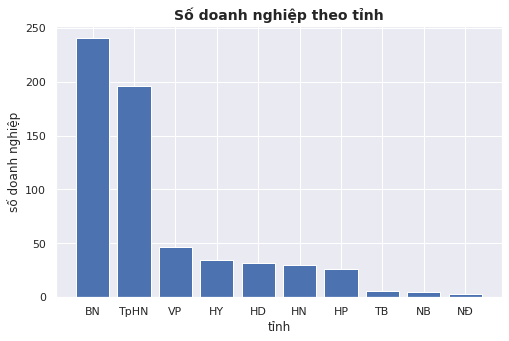

In [16]:
# fig1: number of enterprises by province
tmp_df = ind26_rrd_df['tinh'].value_counts().reset_index()
tmp_df.columns = ['tinh', 'count']

plt.figure(figsize=(8, 5))
plt.bar(
    data=tmp_df,
    x='tinh',
    height='count',
    tick_label=['BN', 'TpHN', 'VP', 'HY', 'HD', 'HN', 'HP', 'TB', 'NB', 'NĐ'],
)

plt.xlabel('tỉnh')
# plt.xticks(fontsize=9)
plt.ylabel('số doanh nghiệp')
plt.title('Số doanh nghiệp theo tỉnh', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig1')
plt.show()

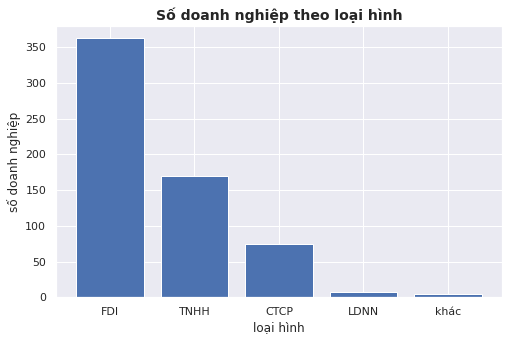

In [17]:
# fig2: number of enterprises by type
tmp_df = ind26_rrd_df['lhdn'].value_counts().reset_index()
tmp_df.columns = ['lhdn', 'count']
tmp_df.loc[4, 'count'] = tmp_df.loc[4:, 'count'].sum()
tmp_df.drop([5, 6, 7], axis=0, inplace=True)

plt.figure(figsize=(8, 5))
plt.bar(
    data=tmp_df,
    x=tmp_df['lhdn'].astype(str),
    height='count',
    tick_label=['FDI', 'TNHH', 'CTCP', 'LDNN', 'khác'],
)

plt.xlabel('loại hình')
plt.ylabel('số doanh nghiệp')
plt.title('Số doanh nghiệp theo loại hình', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig2')
plt.show()

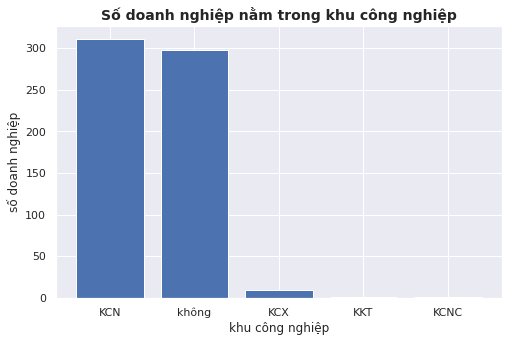

In [18]:
# fig3: number of enterprises located in IP
ind26_rrd_df.fillna(0, inplace=True)
tmp_df = ind26_rrd_df['khucn'].value_counts().reset_index()
tmp_df.columns = ['khucn', 'count']

plt.figure(figsize=(8, 5))
plt.bar(
    data=tmp_df,
    x=tmp_df['khucn'].astype(str),
    height='count',
    tick_label=['KCN', 'không', 'KCX', 'KKT', 'KCNC'],
)

plt.xlabel('khu công nghiệp')
plt.ylabel('số doanh nghiệp')
plt.title('Số doanh nghiệp nằm trong khu công nghiệp', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig3')
plt.show()

In [19]:
# outliers
iqr = ind26_rrd_df['kqkd1'].quantile(0.75) - ind26_rrd_df['kqkd1'].quantile(0.25)
outliers_rmed_df = ind26_rrd_df.loc[
        (ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr) &
        (ind26_rrd_df['kqkd1'] >= ind26_rrd_df['kqkd1'].quantile(0.25) - 1.5*iqr)
]

print('number of outliers: {}'.format(ind26_rrd_df.shape[0] - outliers_rmed_df.shape[0]))
# print(outliers_rmed_df['tinh'].value_counts())

number of outliers: 101


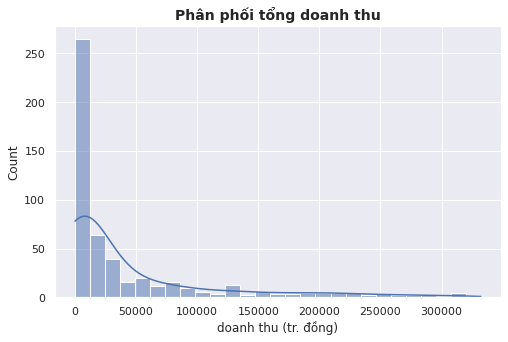

In [20]:
# fig4: revenue density after removing outliers
plt.figure(figsize=(8, 5))
sns.histplot(
    data=outliers_rmed_df,
    x='kqkd1',
    kde=True
)

plt.xlabel('doanh thu (tr. đồng)')
plt.title('Phân phối tổng doanh thu', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig4')
plt.show()

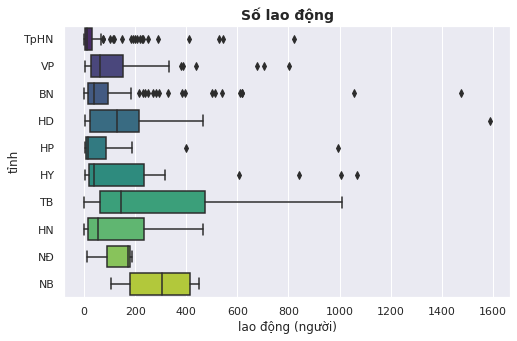

In [21]:
# fig5: labor
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    x='tsld',
    y='tinh',
    palette='viridis'
)
ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('lao động (người)')
plt.ylabel('tỉnh')
plt.title('Số lao động', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig5')
plt.show()

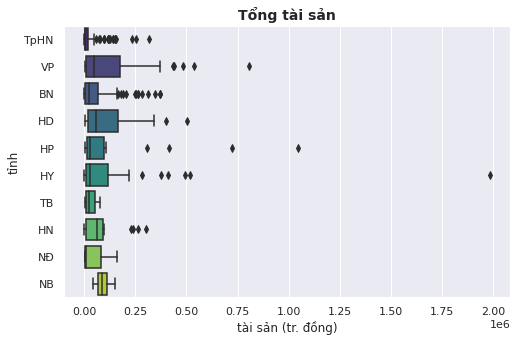

In [22]:
# fig6: assets
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    x='ts12',
    y='tinh',
    palette='viridis'
)
ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('tài sản (tr. đồng)')
plt.ylabel('tỉnh')
plt.title('Tổng tài sản', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig6')
plt.show()

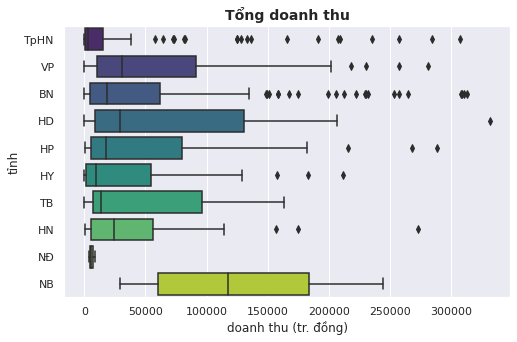

In [23]:
# fig7: revenue
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    y='tinh',
    x='kqkd1', 
    palette='viridis'
)
ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('doanh thu (tr. đồng)')
plt.ylabel('tỉnh')
plt.title('Tổng doanh thu', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig7')
plt.show()

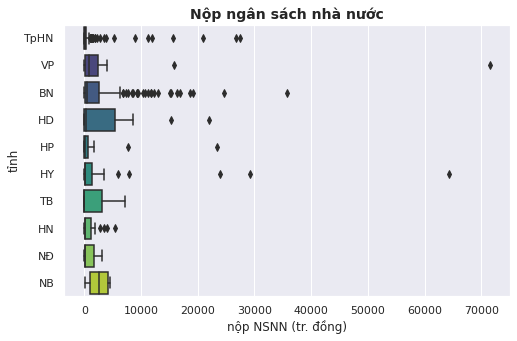

In [24]:
# fig8: state budget
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    y='tinh',
    x='nns12', 
    palette='viridis'
)
ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('nộp NSNN (tr. đồng)')
plt.ylabel('tỉnh')
plt.title('Nộp ngân sách nhà nước', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig8')
plt.show()

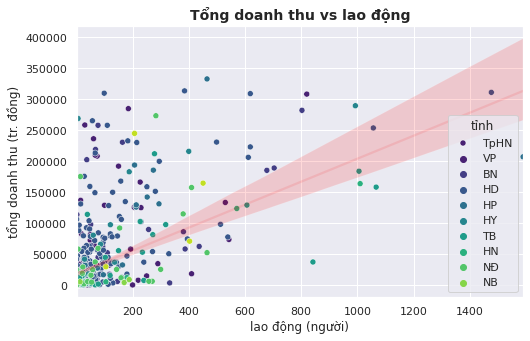

In [25]:
# fig9: labor vs revenue
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    x='tsld',
    y='kqkd1',
    hue='tinh',
    palette='viridis',
)
ax.legend(title='tỉnh', labels=['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'], frameon=True)

sns.regplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] < ind26_rrd_df['kqkd1'].quantile(0.8)],
    x='tsld',
    y='kqkd1',
    scatter=False,
    line_kws={'color': 'red', 'alpha': 0.1},
    ax=ax
)

ax.set_xlabel('lao động (người)')
ax.set_ylabel('tổng doanh thu (tr. đồng)')
ax.set_title('Tổng doanh thu vs lao động', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig9')
plt.show()

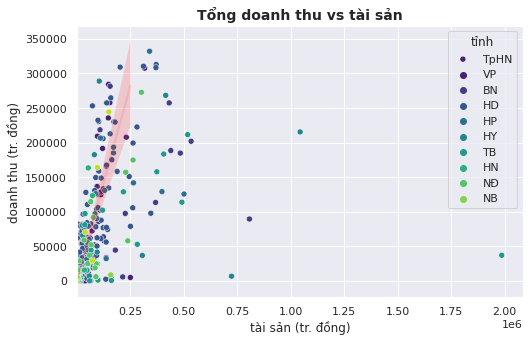

In [26]:
# fig10: assets vs revenue
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['kqkd1'] <= ind26_rrd_df['kqkd1'].quantile(0.75) + 1.5*iqr],
    x='ts12',
    y='kqkd1',
    hue='tinh',
    palette='viridis',
)
ax.legend(title='tỉnh', labels=['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'], frameon=True, loc='upper right')

sns.regplot(
    data=ind26_rrd_df.loc[ind26_rrd_df['ts12'] < ind26_rrd_df['ts12'].quantile(0.8)],
    x='ts12',
    y='kqkd1',
    scatter=False,
    line_kws={'color': 'red', 'alpha': 0.1},
    ax=ax
)

ax.set_xlabel('tài sản (tr. đồng)')
ax.set_ylabel('doanh thu (tr. đồng)')
ax.set_title('Tổng doanh thu vs tài sản', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig10')
plt.show()

## Data: by districts
- 65 districts of 10 provinces in Red river delta
- inputs: tsld, ts12
- outputs: kqkd1, nns12

In [27]:
# by district
cols = ['tinh', 'huyen', 'tsld', 'ts12', 'kqkd1', 'nns12']
rrd_districts_df = outliers_rmed_df[cols].groupby(['tinh', 'huyen']).agg('mean')
rrd_districts_df = rrd_districts_df.reset_index()
rrd_districts_df

,tinh,huyen,tsld,ts12,kqkd1,nns12
0,01,001,30.200000,35460.400000,57697.000000,2404.320000
1,01,002,24.500000,32166.000000,59725.750000,5451.500000
2,01,003,11.750000,6636.250000,4194.750000,154.800000
3,01,004,79.285714,17064.714286,12072.285714,323.257143
4,01,005,9.368421,22163.578947,2418.684211,129.352632
...,...,...,...,...,...,...
60,36,356,170.000000,7510.000000,3950.000000,175.000000
61,36,362,13.000000,3066.000000,5235.000000,16.000000
62,36,366,188.000000,159777.000000,8588.000000,3128.000000
63,37,373,353.666667,96145.000000,159673.666667,3250.666667


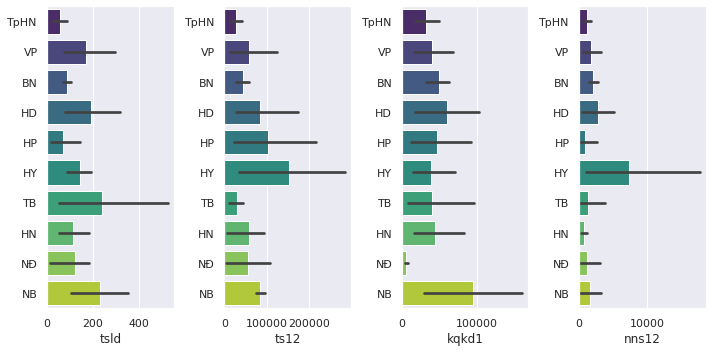

In [28]:
# fig: 4 bar plots
fig, axes = plt.subplots(
    nrows=1, ncols=4,
    figsize=(10, 5)
)

cols = ['tsld', 'ts12', 'kqkd1', 'nns12']
for col, ax in zip(cols, axes.flatten()):
    sns.barplot(
        data=rrd_districts_df,
        x=col,
        y='tinh',
        palette='viridis',
        ax=ax
    )
    ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])
    ax.set_ylabel(None)

plt.tight_layout()
plt.show()

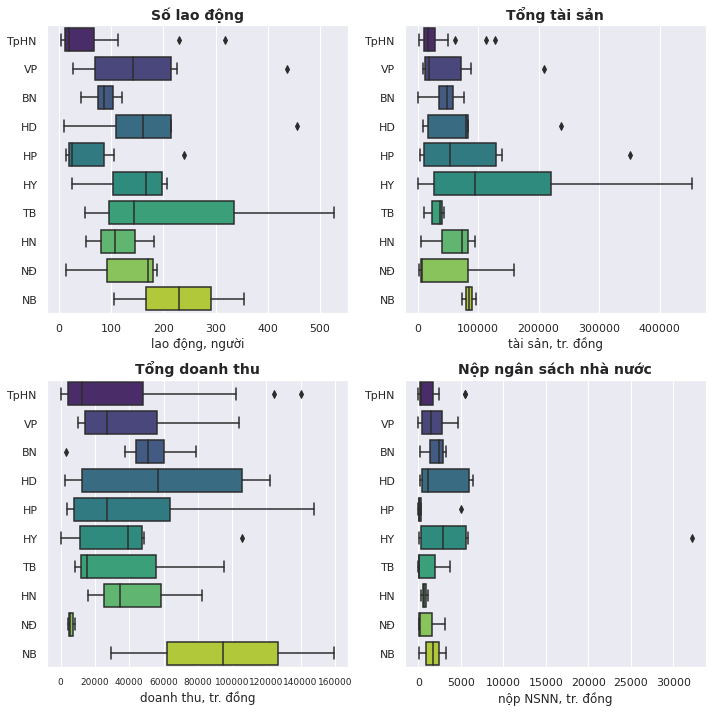

In [29]:
# fig11: 4 boxplots
fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(10, 10)
)

cols = ['tsld', 'ts12', 'kqkd1', 'nns12']
for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(
        data=rrd_districts_df,
        x=col,
        y='tinh',
        palette='viridis',
        ax=ax
    )
    ax.set_yticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])
    ax.set_ylabel(None)

axes[0, 0].set_xlabel('lao động, người')
axes[0, 0].set_title('Số lao động', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('tài sản, tr. đồng')
axes[0, 1].set_title('Tổng tài sản', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('doanh thu, tr. đồng')
axes[1, 0].tick_params(axis='x', labelsize=9)
axes[1, 0].set_title('Tổng doanh thu', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('nộp NSNN, tr. đồng')
axes[1, 1].set_title('Nộp ngân sách nhà nước', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig11')
plt.show()

# DEA
- pyDEA: https://github.com/jzuccollo/pyDEA
- DEA: https://github.com/metjush/envelopment-py

In [30]:
!pip install pulp

     |████████████████████████████████| 40.6MB 1.3MB/s 


In [31]:
import pulp
from scipy.optimize import fmin_slsqp
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
# pyDEA
class DEAProblem:
    """
    A container for the elements of a data envelopment analysis problem. Sets
    up the linear programmes and solves them with pulp.
    Requires:
        inputs: a pandas dataframe of the inputs to the DMUs
        outputs: a pandas dataframe of the outputs from the DMUs
        kind: 'VRS' or 'CRS'
        in_weights: the weight restriction to apply to all inputs to all DMUs
                    (default is [0, inf])
        out_weights: the weight restriction to apply to all outputs to all DMUs
                     (default is [0, inf)
    Weight restrictions must be specified as a list. To specify only one bound
    leave the other as None, eg. in_weights=[1, None].
    """

    def __init__(self, inputs, outputs, returns='CRS',
                in_weights=[0, None], out_weights=[0, None]):
        """
        Set up the DMUs' problems, ready to solve.
        """
        self.inputs = _to_dataframe(inputs)
        self.outputs = _to_dataframe(outputs)
        self.returns = returns

        self.J, self.I = self.inputs.shape  # no of firms, inputs
        _, self.R = self.outputs.shape  # no of outputs
        self._i = range(self.I)  # inputs
        self._r = range(self.R)  # outputs
        self._j = range(self.J)  # DMUs

        self._in_weights = in_weights  # input weight restrictions
        self._out_weights = out_weights  # output weight restrictions

        # creates dictionary of pulp.LpProblem objects for the DMUs
        self.dmus = self._create_problems()

    def _create_problems(self):
        """
        Iterate over the inputs and create a dictionary of LP problems, one
        for each DMU.
        """
        dmu_dict = {}
        for j0 in self._j:
            dmu_dict[j0] = self._make_problem(j0)
        
        return dmu_dict

    def _make_problem(self, j0):
        """
        Create a pulp.LpProblem for a DMU.
        """
        # Set up pulp
        prob = pulp.LpProblem("".join(["DMU_", str(j0)]), pulp.LpMaximize)
        self.inputWeights = pulp.LpVariable.dicts("inputWeight", (self._j, self._i),
                                                  lowBound=self._in_weights[0], upBound=self._in_weights[1])
        self.outputWeights = pulp.LpVariable.dicts("outputWeight", (self._j, self._r),
                                                   lowBound=self._out_weights[0], upBound=self._out_weights[1])

        # Set returns to scale
        if self.returns == "CRS":
            w = 0
        elif self.returns == "VRS":
            w = pulp.LpVariable.dicts("w", (self._j, self._r))
        else:
            raise Exception(ValueError)

        # Set up objective function
        prob += pulp.LpAffineExpression(
            [(self.outputWeights[j0][r1], self.outputs.values[j0][r1]) for r1 in self._r]) - w

        # Set up constraints
        prob += pulp.LpAffineExpression([(self.inputWeights[j0][i1],
                                          self.inputs.values[j0][i1]) for i1 in self._i]) == 1, "Norm_constraint"
        for j1 in self._j:
            prob += self._dmu_constraint(j0, j1) - \
                w <= 0, "".join(["DMU_constraint_", str(j1)])
        
        return prob

    def _dmu_constraint(self, j0, j1):
        """
        Calculate and return the DMU constraint for a single DMU's LP problem.
        """
        eOut = pulp.LpAffineExpression(
            [(self.outputWeights[j0][r1], self.outputs.values[j1][r1]) for r1 in self._r])
        eIn = pulp.LpAffineExpression(
            [(self.inputWeights[j0][i1], self.inputs.values[j1][i1]) for i1 in self._i])
        
        return eOut - eIn

    def _solver(self):
        """
        Iterate over the dictionary of DMUs' problems, solve them, and collate
        the results into a pandas dataframe.
        """
        sol_status = {}
        sol_weights = {}
        sol_efficiency = {}

        for ind, problem in list(self.dmus.items()):
            problem.solve()
            sol_status[ind] = pulp.LpStatus[problem.status]
            sol_weights[ind] = {}
            for v in problem.variables():
                sol_weights[ind][v.name] = v.varValue
            sol_efficiency[ind] = pulp.value(problem.objective)
        
        return sol_status, sol_efficiency, sol_weights

    def _build_weight_results_dict(self, sol_weights):
        """
        Rename weights from input and output column names, then build a
        pandas dataframe of all weights.
        """
        import re
        tmp_dict = {}
        for dmu, d in list(sol_weights.items()):
            tmp_dict[dmu] = {}
            for key, _ in list(d.items()):
                m = re.search(r'[0-9]+$',key)
                i = int(m.group(0))
                if key.startswith("input"):
                    tmp_dict[dmu]["in_" + str(self.inputs.columns[i])] = d[key]
                if key.startswith("output"):
                    tmp_dict[dmu][
                        "out_" + str(self.outputs.columns[i])] = d[key]
        weight_results = pd.DataFrame.from_dict(tmp_dict).T

        return weight_results

    def solve(self, sol_type='technical'):
        """"
        Solve the problem and create attributes to hold the solutions.
        Takes:
            sol_type: 'technical'/'allocative'/'economic'
            dmus: tuple defining range of DMUs to solve for.
        """
        if sol_type == 'technical':
            sol_status, sol_efficiency, sol_weights = self._solver()
            weight_results = self._build_weight_results_dict(sol_weights)
            status_df = pd.Series(sol_status, name='Status')
            status_df.index = self.inputs.index
            efficiency_df = pd.Series(sol_efficiency, name='Efficiency')
            efficiency_df.index = self.inputs.index

            return DEAResults((('Status', status_df),
                               ('Efficiency', efficiency_df),
                               ('Weights', weight_results)))
        else:
            print("Solution type not yet implemented.")
            print("Solving for technical efficiency instead.")
            self.solve()

class DEAResults(dict):
    """
    A class to hold the results of a DEAProblem and provide methods for
    their examination. Essentially a dictionary of pandas Series with
    methods for conducting particular operations on DEA results.
    """
#    def __init__(self):
#        super(DEAResults, self).__init__()
#        pass

    def find_comparators(self, dmu):
        """
        Return the DMUs that form the frontier for the specified DMU.
        """
        pass

    def env_corr(self, env_vars, qq_plot=False):
        """
        Determine correlations with environmental/non-discretionary variables
        using a logit regression. Tobit will be implemented when available
        upstream in statsmodels.
        Takes:
            env_vars: A pandas dataframe of environmental variables
        Returns:
            corr_mod: the statsmodels' model instance containing the inputs
                      and results from the logit model.
        Note that there can be no spaces in the variables' names.
        """
        import matplotlib.pyplot as plt
        from statsmodels.regression.linear_model import OLS
        from statsmodels.graphics.gofplots import qqplot

        env_data = _to_dataframe(env_vars)
        corr_data = env_data.join(self['Efficiency'])
        corr_mod = OLS.from_formula(
            "Efficiency ~ " + " + ".join(env_vars.columns), corr_data)
        corr_res = corr_mod.fit()

        # plot qq of residuals
        if qq_plot:
            qqplot(corr_res.resid, line='s')
            plt.title('Distribution of residuals')

        print(corr_res.summary())

        return corr_res

def _to_dataframe(indata):
    """
    Indexers require input to be a dataframe but the user may pass a
    series. Check and cast series to dataframes.
    """
    if type(indata) == pd.core.frame.DataFrame:
        return indata
    elif type(indata) == pd.core.series.Series:
        return pd.DataFrame(indata, columns=['input_data'])
    else:
        raise TypeError(
            "Input data is not a valid pandas DataFrame or Series.")

In [33]:
# DEA class
class DEA(object):
    def __init__(self, inputs, outputs):
        """
        initialize DEA object
        n = number of entities (observations)
        m = number of inputs (variables, features)
        r = number of outputs
        :param inputs: inputs, nxm np array
        :param outputs: outputs, nxr np array
        :return: self
        """
        # data
        self.inputs = inputs
        self.outputs = outputs
        # parameters
        self.n = inputs.shape[0]
        self.m = inputs.shape[1]
        self.r = outputs.shape[1]
        # iterators
        self.unit_ = range(self.n)
        self.input_ = range(self.m)
        self.output_ = range(self.r)
        # result arrays
        self.output_w = np.zeros((self.r, 1), dtype=np.float) # output weights
        self.input_w = np.zeros((self.m, 1), dtype=np.float) # input weights
        self.lambdas = np.zeros((self.n, 1), dtype=np.float) # unit efficiencies
        self.efficiency = np.zeros_like(self.lambdas) # theta
        # names
        self.names = []

    def __efficiency(self, unit):
        """
        efficiency function with already computed weights
        :param unit: which production unit to compute for
        :return: efficiency
        """
        # compute efficiency
        denominator = np.dot(self.inputs, self.input_w)
        numerator = np.dot(self.outputs, self.output_w)

        return (numerator / denominator)[unit]
    
    def __target(self, x, unit):
        """
        theta target function for one unit
        :param x: combined weights
        :oaram unit: which production unit to compute
        :return: theta
        """
        in_w, out_w, lambdas = x[:self.m], x[self.m:(self.m+self.r)], x[(self.m+self.r):] # unroll the weights
        denominator = np.dot(self.inputs[unit], in_w)
        numerator = np.dot(self.outputs[unit], out_w)

        return numerator / denominator
    
    def __constraints(self, x, unit):
        """
        constraints for optimization for one unit
        :param x: combined weights
        :param unit: which production unit to compute
        :return: array of constraints
        """
        in_w, out_w, lambdas = x[:self.m], x[self.m:(self.m+self.r)], x[(self.m+self.r):] # unroll the weights
        constr = [] # init the constraint array

        # for each input, lambdas with inputs
        for input in self.input_:
            t = self.__target(x, unit)
            lhs = np.dot(self.inputs[:, input], lambdas)
            cons = t*self.inputs[unit, input] - lhs
            constr.append(cons)

        # for each output, lambdas with outputs
        for output in self.output_:
            lhs = np.dot(self.outputs[:, output], lambdas)
            cons = lhs - self.outputs[unit, output]
            constr.append(cons)

        # for each unit
        for u in self.unit_:
            constr.append(lambdas[u])

        return np.array(constr)

    def __optimize(self):
        """
        optimization of the DEA model
        use: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html 
        A = coefficients in the constraints
        b = rhs of constraints
        c = coefficients of the target fuction
        :return:
        """
        # from scipy.optimize import fmin_slsqp
        d0 = self.m + self.r + self.n
        # iterater over units
        for unit in self.unit_:
            # weights
            x0 = np.random.rand(d0) - 0.5
            x0 = fmin_slsqp(self.__target, x0, f_ieqcons=self.__constraints, args=(unit,))
            # unroll weights
            self.input_w, self.output_w, self.lambdas = x0[:self.m], x0[self.m:(self.m+self.r)], x0[(self.m+self.r):]
            self.efficiency[unit] = self.__efficiency(unit)

    def name_units(self, names):
        """
        provide names for units for presentation purpose
        :param names: a list of names, equal in length to the number of units
        :return:
        """
        assert(self.n == len(names))
        self.names = names

    def fit(self):
        """
        optimize the dataset, generate basic table
        :retunr: table
        """
        self.__optimize() # optimize

        # print("Final thetas for each unit:\n")
        # print("---------------------------\n")
        # for n, eff in enumerate(self.efficiency):
        #     if len(self.names) > 0:
        #         name = "Unit %s" % self.names[n]
        #     else:
        #         name = "Unit %d" % (n+1)
        #     print("%s theta: %.4f" % (name, eff))
        #     print("\n")
        # print("---------------------------\n")

## Scale data
- sklearn MinmaxScaler()

In [34]:
# scale data
scaler = MinMaxScaler()

dea_df = rrd_districts_df.copy()
dea_df[['tsld', 'ts12', 'kqkd1', 'nns12']] = scaler.fit_transform(dea_df[['tsld', 'ts12', 'kqkd1', 'nns12']])
dea_df

,tinh,huyen,tsld,ts12,kqkd1,nns12
0,01,001,0.051875,0.075107,0.361343,0.074705
1,01,002,0.041004,0.067818,0.374049,0.169423
2,01,003,0.016688,0.011335,0.026271,0.004781
3,01,004,0.145491,0.034407,0.075606,0.010017
4,01,005,0.012146,0.045688,0.015148,0.003990
...,...,...,...,...,...,...
60,36,356,0.318500,0.013268,0.024738,0.005409
61,36,362,0.019072,0.003436,0.032786,0.000466
62,36,366,0.352829,0.350151,0.053785,0.097199
63,37,373,0.668786,0.209368,1.000000,0.101012


## VRS model

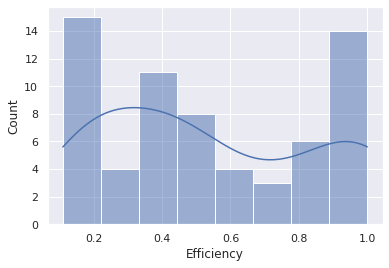

CPU times: user 4.29 s, sys: 1.3 s, total: 5.6 s
Wall time: 7.89 s


In [35]:
%%time
# vrs model (input-oriented)
vrs = DEAProblem(
    inputs=dea_df[['tsld', 'ts12']],
    outputs=dea_df[['kqkd1', 'nns12']],
    returns='VRS'
)
vrs_results = vrs.solve()

# fig12: distribution of efficiency scores
plt.figure()
sns.histplot(
    x=vrs_results['Efficiency'],
    kde=True
)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig12')
plt.show()

## CRS model

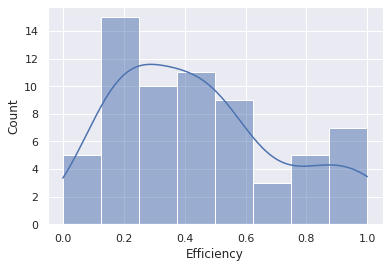

CPU times: user 842 ms, sys: 1.22 s, total: 2.06 s
Wall time: 3.79 s


In [36]:
%%time
# crs model (input-oriented)
crs = DEAProblem(
    inputs=dea_df[['tsld', 'ts12']],
    outputs=dea_df[['kqkd1', 'nns12']],
    returns='CRS'
)
crs_results = crs.solve()

# distribution of efficiency scores
plt.figure()
sns.histplot(
    x=crs_results['Efficiency'],
    kde=True
)

plt.show()

In [ ]:
%%time
# crs_2 model (input-oriented)
X = dea_df[['tsld', 'ts12']].values
y = dea_df[['kqkd1', 'nns12']].values

crs_2 = DEA(X, y)
crs_2.fit()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.8536273334718678
            Iterations: 8
            Function evaluations: 568
            Gradient evaluations: 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.000000167548176
            Iterations: 7
            Function evaluations: 497
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.34434378582685193
            Iterations: 5
            Function evaluations: 355
            Gradient evaluations: 5
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.20747030819499793
            Iterations: 8
            Function evaluations: 568
            Gradient evaluations: 8
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.1367175443725199
            Iterations: 5
            Function ev

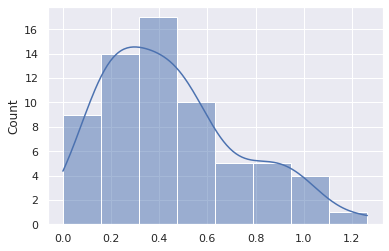

In [ ]:
# distribution of efficiency scores
plt.figure()
sns.histplot(
    x=crs_2.efficiency[:, 0],
    kde=True
)

plt.show()

In [37]:
# merge te scores
rrd_districts_df['te_vrs'] = vrs_results['Efficiency']
rrd_districts_df['te_crs'] = crs_results['Efficiency']
rrd_districts_df

,tinh,huyen,tsld,ts12,kqkd1,nns12,te_vrs,te_crs
0,01,001,30.200000,35460.400000,57697.000000,2404.320000,0.853902,0.853627
1,01,002,24.500000,32166.000000,59725.750000,5451.500000,1.000000,1.000000
2,01,003,11.750000,6636.250000,4194.750000,154.800000,0.377555,0.344344
3,01,004,79.285714,17064.714286,12072.285714,323.257143,0.215222,0.207470
4,01,005,9.368421,22163.578947,2418.684211,129.352632,0.136718,0.136718
...,...,...,...,...,...,...,...,...
60,36,356,170.000000,7510.000000,3950.000000,175.000000,0.134050,0.123349
61,36,362,13.000000,3066.000000,5235.000000,16.000000,0.884395,0.766838
62,36,366,188.000000,159777.000000,8588.000000,3128.000000,0.110063,0.109700
63,37,373,353.666667,96145.000000,159673.666667,3250.666667,1.000000,0.522411


In [38]:
# write csv file
rrd_districts_df.to_csv('/content/drive/MyDrive/Colab Notebooks/practices/data/rrd_districts.csv', index=False)

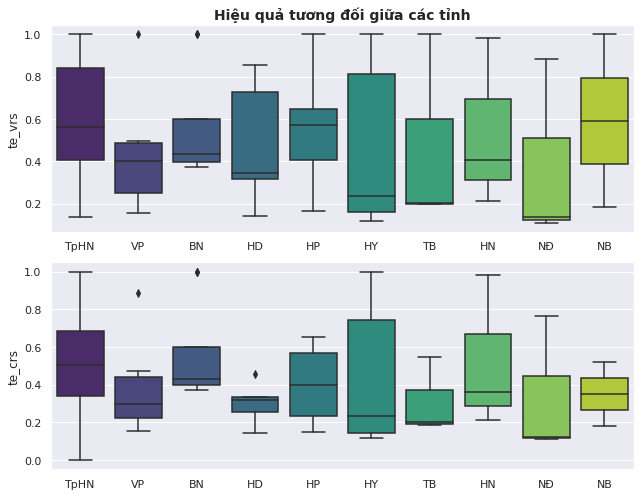

In [39]:
# fig13: 2 boxplots
fig, axes = plt.subplots(
    nrows=2, ncols=1,
    figsize=(9, 7)
)

cols = ['te_vrs', 'te_crs']
for col, ax in zip(cols, axes.flatten()):
    sns.boxplot(
        data=rrd_districts_df,
        y=col,
        x='tinh',
        palette='viridis',
        ax=ax
    )
    ax.set_xticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])
    ax.set_xlabel(None)
    # ax.set_title('Hiệu quả tương đối giữa các tỉnh', fontdict={'fontsize':12, 'fontweight':'bold'})

axes[0].set_title('Hiệu quả tương đối giữa các tỉnh', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig13')
plt.show()

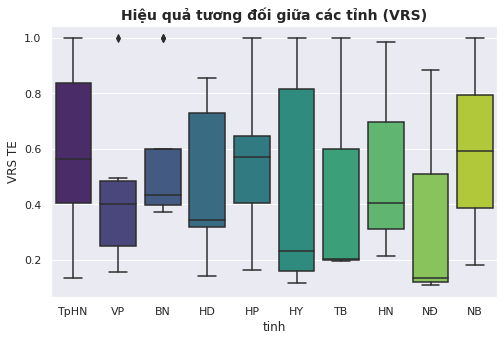

In [40]:
# fig14: te_vrs scores
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=rrd_districts_df,
    x='tinh',
    y='te_vrs', 
    palette='viridis'
)
ax.set_xticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('tinh')
plt.ylabel('VRS TE')
plt.title('Hiệu quả tương đối giữa các tỉnh (VRS)', fontsize=14, fontweight='bold')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/practices/es_dea_gplot/figure/fig14')
plt.show()

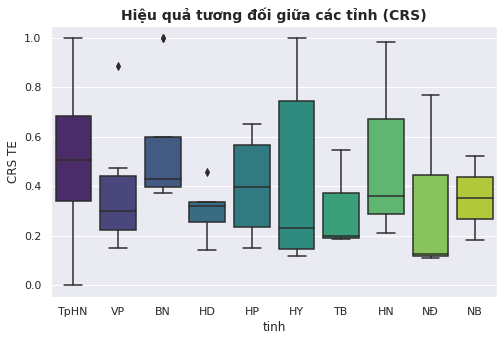

In [41]:
# fig: te_crs scores
plt.figure(figsize=(8, 5))
ax = sns.boxplot(
    data=rrd_districts_df,
    x='tinh',
    y='te_crs', 
    palette='viridis'
)
ax.set_xticklabels(['TpHN', 'VP', 'BN', 'HD', 'HP', 'HY', 'TB', 'HN', 'NĐ', 'NB'])

plt.xlabel('tinh')
plt.ylabel('CRS TE')
plt.title('Hiệu quả tương đối giữa các tỉnh (CRS)', fontsize=14, fontweight='bold')
plt.show()

# ANOVA

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
# ols model
model = ols(
    formula='te_vrs ~ C(tinh)',
    data=rrd_districts_df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 te_vrs   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.3827
Date:                Fri, 30 Apr 2021   Prob (F-statistic):              0.939
Time:                        17:16:43   Log-Likelihood:                -13.825
No. Observations:                  65   AIC:                             47.65
Df Residuals:                      55   BIC:                             69.39
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6182      0.068      9.111      0.000       0.482       0.754
C(tinh)[T.26]    -0.1732      0.149     -1.161      0.251      -0.472       0.126
C(tinh)[T.27]    -0.0558      0.134     -0.418      0.678      -0.323       0.212
C(tinh)[T.30]    -0.1406      0.161     -0.876      0.385      -0.462       0.181
C(tinh)[T.31]    -0.0636      0.149     -0.426      0.672      -0.362       0.235
C(tinh)[T.33]    -0.1630      0.149     -1.092      0.279      -0.462       0.136
C(tinh)[T.34]    -0.1519      0.200     -0.760      0.450      -0.552       0.248
C(tinh)[T.35]    -0.0835      0.200     -0.418      0.677      -0.484       0.317
C(tinh)[T.36]    -0.2420      0.200     -1.212      0.231      -0.642       0.158
C(tinh)[T.37]    -0.0272      0.240     -0.113      0.910      -0.508       0.454
==============================================================================
Omnibus:                       14.622   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.503
Skew:                           0.446   Prob(JB):                       0.0638
Kurtosis:                       1.888   Cond. No.                         7.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can not reject the H0 hypothesis that there is no difference among groups:

In [44]:
# anova table
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(tinh),0.364694,9.0,0.382708,0.938517
Residual,5.823470,55.0,NaN,NaN
